In [150]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from math import pi
from math import sqrt
from math import exp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [151]:
#-------------------------------------------------------------------------------
#wczytywanie danych
#-------------------------------------------------------------------------------
dataset = pd.read_csv('../../wine.data', sep=",", header = None, engine='python') 
dataset.columns = ['class','alcohol (‰)','malic acid (g/l)', 'ash (g/l)','alcalinity of ash (%)', #mały opis każdej z kolumn
                'magnesium (mg/l)','total phenols (mg/l)','flavanoids (mg/l)','nonflavanoid phenols (mg/l)',
                'Proanthocyanins (mg/l)','color intensity (some numeric scale)','Hue (some numeric scale)',
                'OD280/OD315 of diluted wines (unknown unit)','proline (unknown unit)']

#rozbijamy 
whichClass = dataset['class']
data = dataset.drop('class',axis=1)

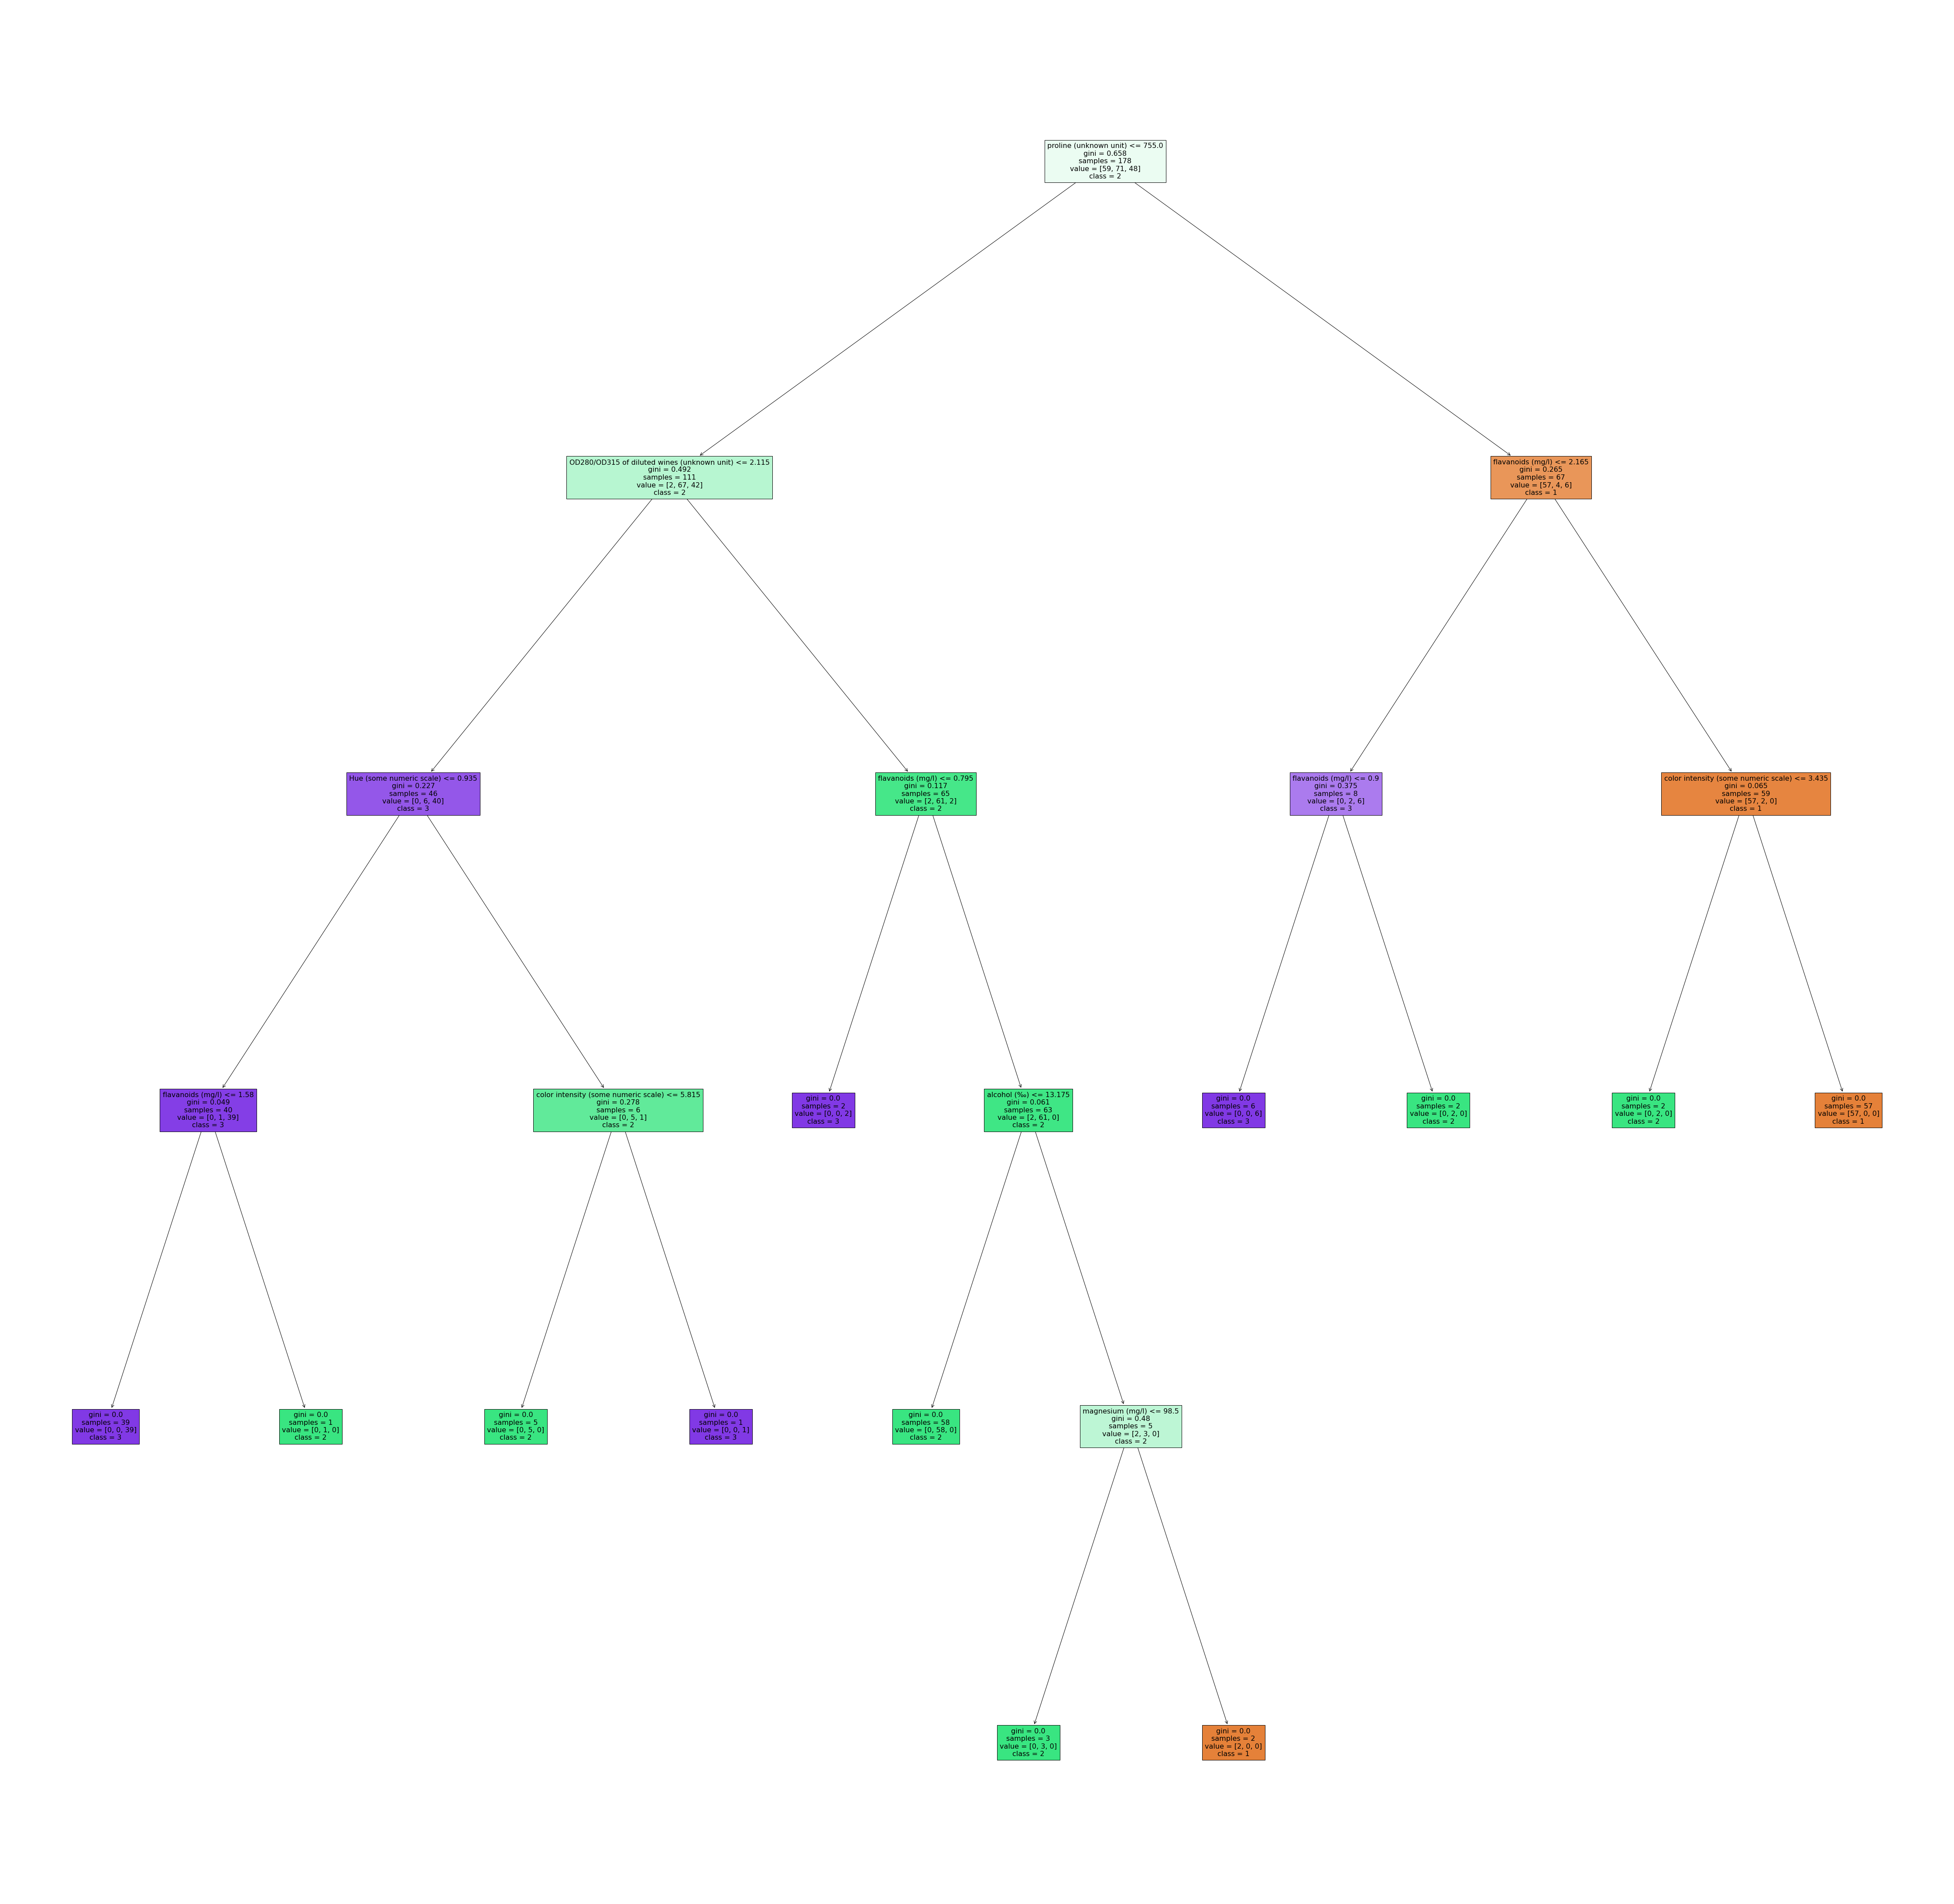

In [152]:
#-------------------------------------------------------------------------------
#drzewo
#-------------------------------------------------------------------------------
fig = plt.figure(figsize=(80, 80))
myTree = DecisionTreeClassifier()
myTree.fit(data, whichClass)
plot_tree(myTree, filled=True, feature_names = data.columns, class_names = ['1','2','3'])
plt.show()
#polecam pobrać obrazek, bo w jupyterze mało widać

In [153]:
#-------------------------------------------------------------------------------
#skuteczność drzewa
#-------------------------------------------------------------------------------

#===
#podwójne podstawienie
#===
accuracy = myTree.score(data,whichClass)
#===
#crossvalidacja
#===
cv_order = 5
cv_results = cross_validate(myTree, data, whichClass, cv=cv_order)
sorted(cv_results.keys())
tmp = cv_results['test_score']
accuracy_cross = tmp.mean()
print("double substitution: ", accuracy)
print("crossvalid: ", accuracy_cross)

double substitution:  1.0
crossvalid:  0.8765079365079365


In [154]:
#-------------------------------------------------------------------------------
#optymalne drzewo - funkcja która nam to znajdzie
#-------------------------------------------------------------------------------
def findBestTree(sample, whichClass):
    
    path = myTree.cost_complexity_pruning_path(data, whichClass) #ścieżka z cp, daje nam m in. nasze współczynniki złożoności 
    ccp_alphas = path.ccp_alphas #współczynniki złożoności
    subTree = [] #tablica, która nam będzie zbierać nasze subdrzewa
    subTree_acc = [] #dokładność każdego subdrzewa
    cv_order = 5 #rząd crossvalidacji, wybrałem ją zamiast accuracy bo accuracy bardzo wprost zależy od alfy, chyba ciut za bardzo...
    
    for alpha in ccp_alphas:        
        clf = DecisionTreeClassifier(ccp_alpha=alpha)
        clf.fit(sample, whichClass)
        subTree.append(clf)
        
        cv_results = cross_validate(clf, sample, whichClass, cv=cv_order)
        sorted(cv_results.keys())
        tmp = cv_results['test_score']
        accuracy_cv = tmp.mean()
        subTree_acc.append(accuracy_cv)
        
    tmp = np.array([ccp_alphas, subTree_acc])
    tmp = np.delete(tmp, (0), axis=1) #wywalamy pierwszy zestaw (nieruszone drzewo) bo on zawsze będzie miał acc 1 a nie o to chodzi
    bests = np.argmax(tmp, axis=1)
    bestTree = subTree[bests[1]+1]
    
    return bestTree

double substitution:  1.0 (full tree) ; 0.9438202247191011 (best tree)
crossvalid:  0.8765079365079365 (full tree) ; 0.8993650793650794 (best tree)


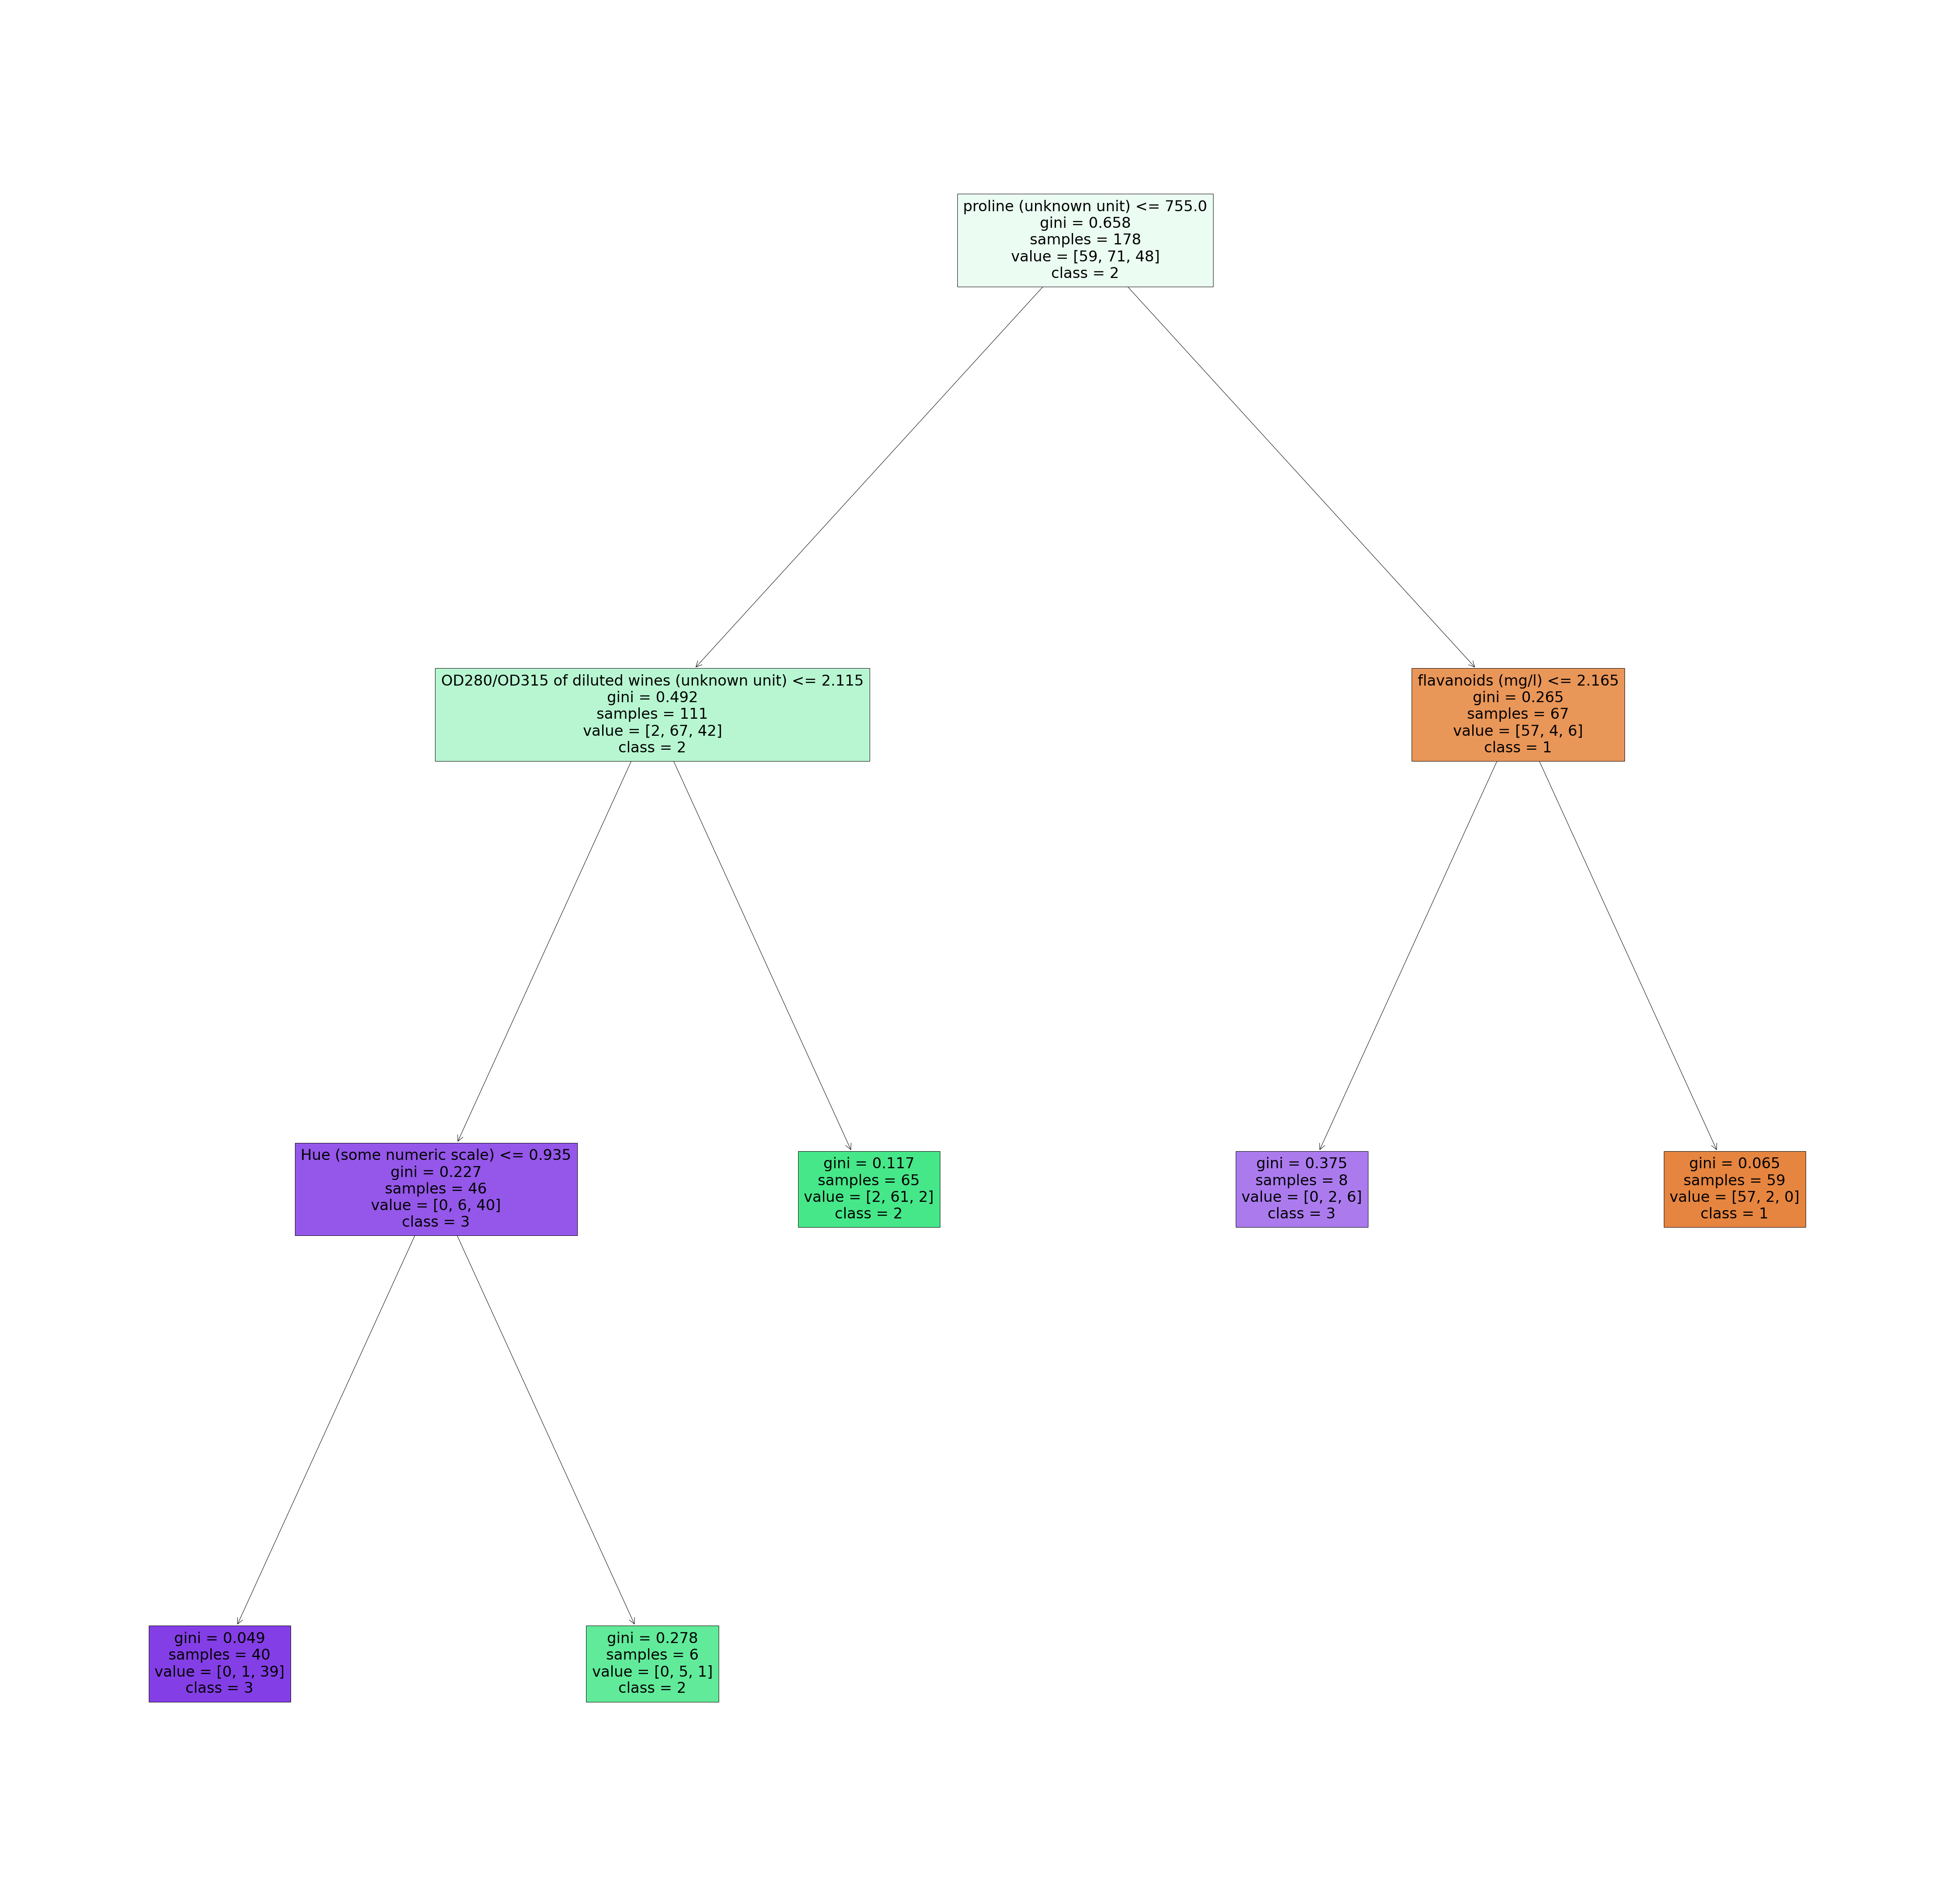

In [155]:
#-------------------------------------------------------------------------------
#optymalne drzewo ze wszystkich danych
#-------------------------------------------------------------------------------

bestTreeAll = findBestTree(data,whichClass)

#===
#podwójne podstawienie
#===
accuracy_all = bestTreeAll.score(data,whichClass)
#===
#crossvalidacja
#===
cv_order = 5
cv_results = cross_validate(bestTreeAll, data, whichClass, cv=cv_order)
sorted(cv_results.keys())
tmp = cv_results['test_score']
accuracy_cross_all = tmp.mean()
print("double substitution: ", accuracy,"(full tree) ;",accuracy_all,"(best tree)")
print("crossvalid: ", accuracy_cross,"(full tree) ;",accuracy_cross_all,"(best tree)")

#===
#rysowanie
#===
fig = plt.figure(figsize=(80, 80))
plot_tree(bestTreeAll, filled=True, feature_names = data.columns, class_names = ['1','2','3'])
plt.show()

In [156]:
#-------------------------------------------------------------------------------
#drzewa dla setów zmiennych
#-------------------------------------------------------------------------------

#małe funkcje pomocnicze
def makeTree(sample, whichClass):
    tree = DecisionTreeClassifier()
    tree.fit(sample, whichClass)
    return tree

def makeCv(tree, data, whichClass, cv_order):
    cv_results = cross_validate(bestTreeAll, data, whichClass, cv=cv_order)
    sorted(cv_results.keys())
    tmp = cv_results['test_score']
    result = tmp.mean()
    return result

twoVar = data.loc[:,'alcohol (‰)':'malic acid (g/l)']
threeVar = data.loc[:,'alcohol (‰)':'ash (g/l)']
fourVar = data.loc[:,'alcohol (‰)':'alcalinity of ash (%)']
fiveVar = data.loc[:,'alcohol (‰)':'magnesium (mg/l)']
sixVar = data.loc[:,'alcohol (‰)':'total phenols (mg/l)']
sevenVar = data.loc[:,'alcohol (‰)':'flavanoids (mg/l)']
eightVar = data.loc[:,'alcohol (‰)':'nonflavanoid phenols (mg/l)']
nineVar = data.loc[:,'alcohol (‰)':'Proanthocyanins (mg/l)']
tenVar = data.loc[:,'alcohol (‰)':'color intensity (some numeric scale)']
elevenVar = data.loc[:,'alcohol (‰)':'Hue (some numeric scale)']
twelveVar = data.loc[:,'alcohol (‰)':'OD280/OD315 of diluted wines (unknown unit)']

#drzewa obtymalne
bestTree2 = findBestTree(twoVar,whichClass)
bestTree3 = findBestTree(threeVar,whichClass)
bestTree4 = findBestTree(fourVar,whichClass)
bestTree5 = findBestTree(fiveVar,whichClass)
bestTree6 = findBestTree(sixVar,whichClass)
bestTree7 = findBestTree(sevenVar,whichClass)
bestTree8 = findBestTree(eightVar,whichClass)
bestTree9 = findBestTree(nineVar,whichClass)
bestTree10 = findBestTree(tenVar,whichClass)
bestTree11 = findBestTree(elevenVar,whichClass)
bestTree12 = findBestTree(twelveVar,whichClass)

#drzewa pełne
fullTree2 = makeTree(twoVar,whichClass)
fullTree3 = makeTree(threeVar,whichClass)
fullTree4 = makeTree(fourVar,whichClass)
fullTree5 = makeTree(fiveVar,whichClass)
fullTree6 = makeTree(sixVar,whichClass)
fullTree7 = makeTree(sevenVar,whichClass)
fullTree8 = makeTree(eightVar,whichClass)
fullTree9 = makeTree(nineVar,whichClass)
fullTree10 = makeTree(tenVar,whichClass)
fullTree11 = makeTree(elevenVar,whichClass)
fullTree12 = makeTree(twelveVar,whichClass)


In [157]:
#-------------------------------------------------------------------------------
#skuteczności tych wszystkich drzew i różnica romiaru obtymalne-pełne
#-------------------------------------------------------------------------------

#===
#podwójne podstawienie
#===
accuracy_best = np.array([bestTree2.score(twoVar,whichClass), bestTree3.score(threeVar,whichClass), 
                           bestTree4.score(fourVar,whichClass), bestTree5.score(fiveVar,whichClass),
                           bestTree6.score(sixVar,whichClass), bestTree7.score(sevenVar,whichClass),
                           bestTree8.score(eightVar,whichClass), bestTree9.score(nineVar,whichClass),
                           bestTree10.score(tenVar,whichClass), bestTree11.score(elevenVar,whichClass),
                           bestTree12.score(twelveVar,whichClass), accuracy_all])

accuracy_full = np.array([fullTree2.score(twoVar,whichClass), fullTree3.score(threeVar,whichClass), 
                           fullTree4.score(fourVar,whichClass), fullTree5.score(fiveVar,whichClass),
                           fullTree6.score(sixVar,whichClass), fullTree7.score(sevenVar,whichClass),
                           fullTree8.score(eightVar,whichClass), fullTree9.score(nineVar,whichClass),
                           fullTree10.score(tenVar,whichClass), fullTree11.score(elevenVar,whichClass),
                           fullTree12.score(twelveVar,whichClass), accuracy])

#===
#crossvalidacja
#===
cv_order = 5
crossVal_best = np.array([makeCv(bestTree2, twoVar, whichClass, cv_order),makeCv(bestTree3, threeVar, whichClass, cv_order),
                            makeCv(bestTree4, fourVar, whichClass, cv_order),makeCv(bestTree5, fiveVar, whichClass, cv_order),
                            makeCv(bestTree6, sixVar, whichClass, cv_order),makeCv(bestTree7, sevenVar, whichClass, cv_order),
                            makeCv(bestTree8, eightVar, whichClass, cv_order),makeCv(bestTree9, nineVar, whichClass, cv_order),
                            makeCv(bestTree10, tenVar, whichClass, cv_order),makeCv(bestTree11, elevenVar, whichClass, cv_order),
                            makeCv(bestTree12, twelveVar, whichClass, cv_order),accuracy_cross_all])

crossVal_full = np.array([makeCv(fullTree2, twoVar, whichClass, cv_order),makeCv(fullTree3, threeVar, whichClass, cv_order),
                            makeCv(fullTree4, fourVar, whichClass, cv_order),makeCv(fullTree5, fiveVar, whichClass, cv_order),
                            makeCv(fullTree6, sixVar, whichClass, cv_order),makeCv(fullTree7, sevenVar, whichClass, cv_order),
                            makeCv(fullTree8, eightVar, whichClass, cv_order),makeCv(fullTree9, nineVar, whichClass, cv_order),
                            makeCv(fullTree10, tenVar, whichClass, cv_order),makeCv(fullTree11, elevenVar, whichClass, cv_order),
                            makeCv(fullTree12, twelveVar, whichClass, cv_order),accuracy_cross])
#===
#ilość węzłów w drzewach
#===
bestTreeNodes = np.array([bestTree2.tree_.node_count, bestTree3.tree_.node_count, bestTree4.tree_.node_count,
                             bestTree5.tree_.node_count, bestTree6.tree_.node_count, bestTree7.tree_.node_count,
                             bestTree8.tree_.node_count, bestTree9.tree_.node_count, bestTree10.tree_.node_count,
                             bestTree11.tree_.node_count, bestTree12.tree_.node_count, bestTreeAll.tree_.node_count])

fullTreeNodes = np.array([fullTree2.tree_.node_count, fullTree3.tree_.node_count, fullTree4.tree_.node_count,
                             fullTree5.tree_.node_count, fullTree6.tree_.node_count, fullTree7.tree_.node_count,
                             fullTree8.tree_.node_count, fullTree9.tree_.node_count, fullTree10.tree_.node_count,
                             fullTree11.tree_.node_count, fullTree12.tree_.node_count, myTree.tree_.node_count])
diffTreeNodes = fullTreeNodes - bestTreeNodes

[81 81 55 55 43 21 21 21 17 17 19 23]
[ 5  5  9  9  5 17 17 11 15 15 13  9]
[76 76 46 46 38  4  4 10  2  2  6 14]


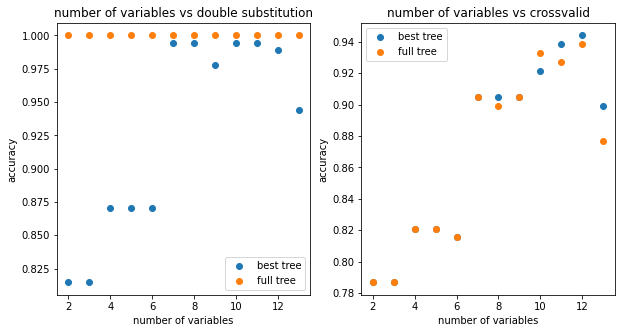

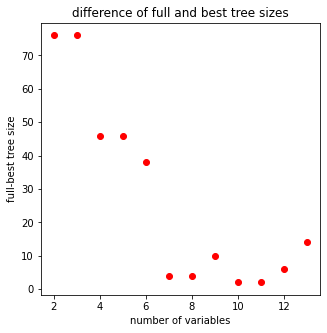

In [161]:
#-------------------------------------------------------------------------------
#wizualka
#-------------------------------------------------------------------------------
varNumber = np.arange(2,14)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1,2 ,1 ) 
ax1.scatter(varNumber, accuracy_best, label='best tree', c='#1f77b4') #seria 1
ax1.scatter(varNumber, accuracy_full, label='full tree', c='#ff7f0e') #seria 2
ax1.title.set_text("number of variables vs double substitution")
ax1.set_xlabel("number of variables")
ax1.set_ylabel("accuracy")
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2) 
ax2.scatter(varNumber, crossVal_best, label='best tree', c='#1f77b4') 
ax2.scatter(varNumber, crossVal_full, label='full tree', c='#ff7f0e')
ax2.title.set_text("number of variables vs crossvalid")
ax2.set_xlabel("number of variables")
ax2.set_ylabel("accuracy")
ax2.legend()

plt.show()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(varNumber, diffTreeNodes, label='difference', c='#ff0000')
ax.title.set_text("difference of full and best tree sizes")
ax.set_xlabel("number of variables")
ax.set_ylabel("full-best tree size")
plt.show()
